### Python Pandas Tutorial

🎯 <br>
✅ EDA techniques <br>
✅ Practical groupby patterns like size() and aggregations <br>
✅ Clean data pipelines with pipe() <br>
✅ Feature engineering using cut(), map(), and apply() <br>
✅ Hierarchical indexing with real business insights <br>
✅ Machine learning prep with reset_index() and tidy formatting <br>

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
# Load the tips dataset
df = sns.load_dataset('tips')

# ---- Data Exploration (EDA) ----
# General info about the dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


#### Exploratory Data Analysis

In [ ]:
# Statistical summary of numeric columns
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [ ]:
# Checking for missing values
df.isnull().sum()/len(df)*100

,0
total_bill,0.0
tip,0.0
sex,0.0
smoker,0.0
day,0.0
time,0.0
size,0.0


In [ ]:
 #Viewing the first few rows
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


##### Categorical Values

<Axes: xlabel='sex'>

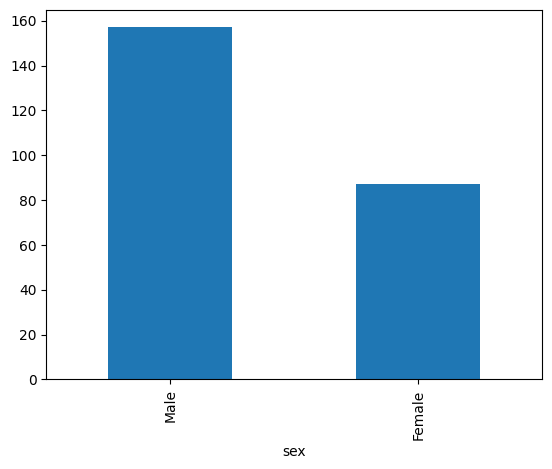

In [ ]:
df['sex'].value_counts().plot(kind='bar')

<Axes: xlabel='smoker'>

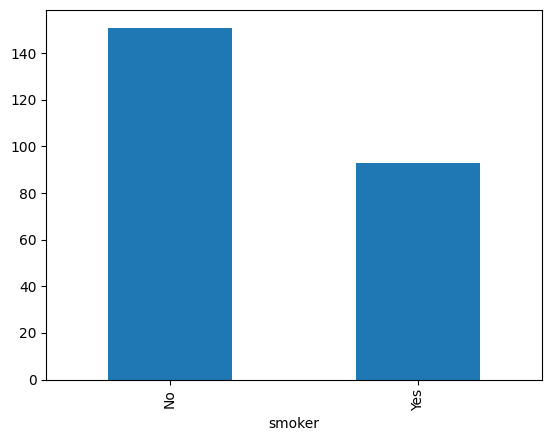

In [ ]:
df['smoker'].value_counts().plot(kind='bar')

<Axes: xlabel='day'>

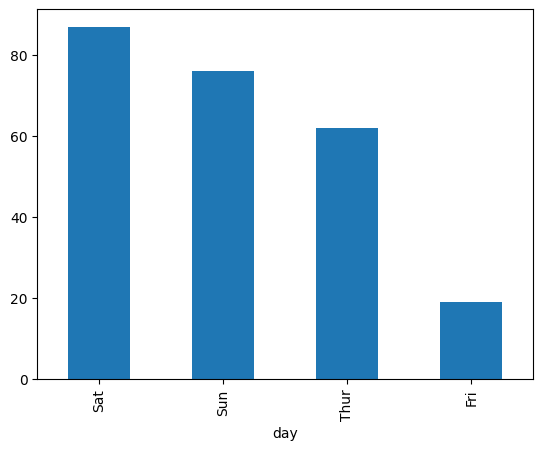

In [ ]:
df['day'].value_counts().plot(kind='bar')

###### Multi-Index : Value Counts with two variables.

In [ ]:
# sort index first sort by day and then by time.
df[['day', 'time']].value_counts().sort_index()


day   time  
Thur  Lunch     61
      Dinner     1
Fri   Lunch      7
      Dinner    12
Sat   Dinner    87
Sun   Dinner    76
Name: count, dtype: int64

##### Continous Values

<Axes: title={'center': 'KDE of Total Bill'}, ylabel='Density'>

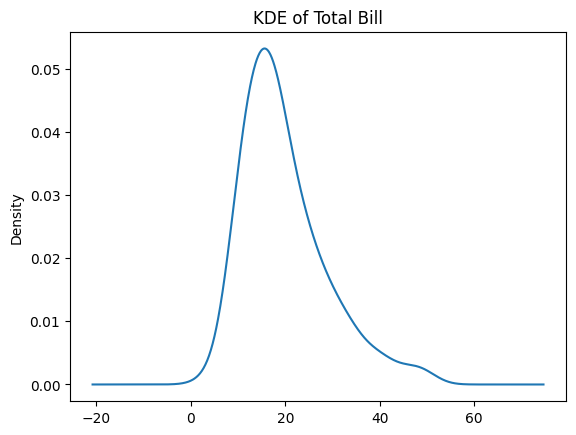

In [ ]:


# KDE of total bill
df['total_bill'].plot(kind='kde', title='KDE of Total Bill')


<Axes: title={'center': 'KDE of Tip'}, ylabel='Density'>

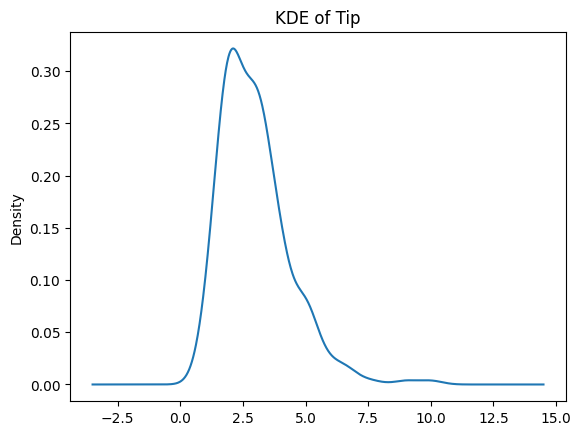

In [ ]:
df['tip'].plot(kind='kde', title='KDE of Tip')


df

#### Data Manipulation

##### Filtering Data Based on Conditions

In [ ]:
 #---- Data Manipulation ----
# Filtering data based on conditions (e.g., filtering for dinner)
dinner_data = df[df['time'] == 'Dinner']
dinner_data

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
df['time']=='Dinner'

,time
0,True
1,True
2,True
3,True
4,True
...,...
239,True
240,True
241,True
242,True


##### Calculating Tip Percent

array([[<Axes: title={'center': 'total_bill'}>,
        <Axes: title={'center': 'tip'}>],
       [<Axes: title={'center': 'size'}>,
        <Axes: title={'center': 'tip_percent'}>]], dtype=object)

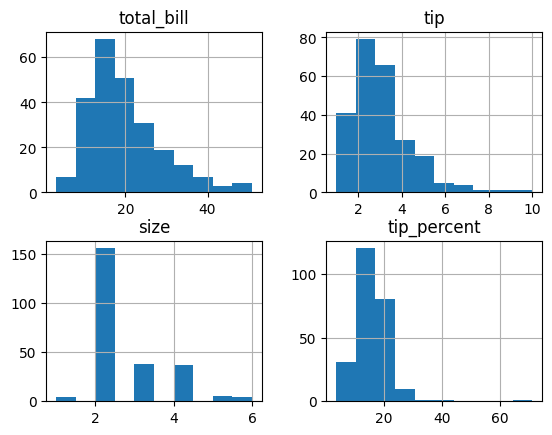

In [ ]:
df['tip_percent'] = df['tip'] / df['total_bill'] * 100
df.hist()

In [ ]:
#axis=0 is column wise axis=1 is row wise
df['tip_pct'] = df.apply(lambda row: row['tip'] / row['total_bill'], axis=1)
df

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,0.059447
1,10.34,1.66,Male,No,Sun,Dinner,3,0.160542
2,21.01,3.50,Male,No,Sun,Dinner,3,0.166587
3,23.68,3.31,Male,No,Sun,Dinner,2,0.139780
4,24.59,3.61,Female,No,Sun,Dinner,4,0.146808
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,0.203927
240,27.18,2.00,Female,Yes,Sat,Dinner,2,0.073584
241,22.67,2.00,Male,Yes,Sat,Dinner,2,0.088222
242,17.82,1.75,Male,No,Sat,Dinner,2,0.098204


<Axes: >

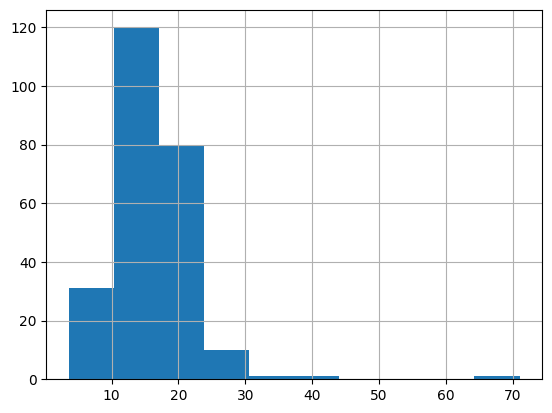

In [ ]:
df['tip_percent'].hist()

#### Pipe Operator Chaining Multiple Data Manipulations.

In [ ]:
df_cleaned = (
    df.pipe(lambda x: x[x['size'] >= 2])  # Filter for size >= 2
    .pipe(lambda x: x.dropna())  # Drop missing values
    .pipe(lambda x: x.assign(tip_percent=x['tip'] / x['total_bill'] * 100))  # Add tip_percent
)

df_cleaned

,total_bill,tip,sex,smoker,day,time,size,tip_percent
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765
...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,20.392697
240,27.18,2.00,Female,Yes,Sat,Dinner,2,7.358352
241,22.67,2.00,Male,Yes,Sat,Dinner,2,8.822232
242,17.82,1.75,Male,No,Sat,Dinner,2,9.820426


#### Group By

##### Group By Multiple Columns

In [ ]:
grouped_data = df.groupby(['day', 'sex']).agg(
    average_tip=('tip', 'mean'),
    average_bill=('total_bill', 'mean')
)

<ipython-input-9-bb655cfd0ec9>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(['day', 'sex']).agg(


In [ ]:
grouped_data

average_tip  average_bill
day  sex                              
Thur Male       2.980333     18.714667
     Female     2.575625     16.715312
Fri  Male       2.693000     19.857000
     Female     2.781111     14.145556
Sat  Male       3.083898     20.802542
     Female     2.801786     19.680357
Sun  Male       3.220345     21.887241
     Female     3.367222     19.872222

##### Group By Time

In [ ]:
time_group = df.groupby('time').agg(
    total_tip=('tip', 'sum'),
    total_bill=('total_bill', 'sum')
)

<ipython-input-11-f91af10d7019>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  time_group = df.groupby('time').agg(


In [ ]:
time_group

,total_tip,total_bill
time,,
Lunch,185.51,1167.47
Dinner,546.07,3660.30


In [ ]:
# Groupby and get size of each group
group_size = df.groupby(['day', 'sex']).size()
group_size

<ipython-input-22-032726fc4892>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_size = df.groupby(['day', 'sex']).size()


day   sex   
Thur  Male      30
      Female    32
Fri   Male      10
      Female     9
Sat   Male      59
      Female    28
Sun   Male      58
      Female    18
dtype: int64

##### Does size lead to larger average tip

<Axes: xlabel='size'>

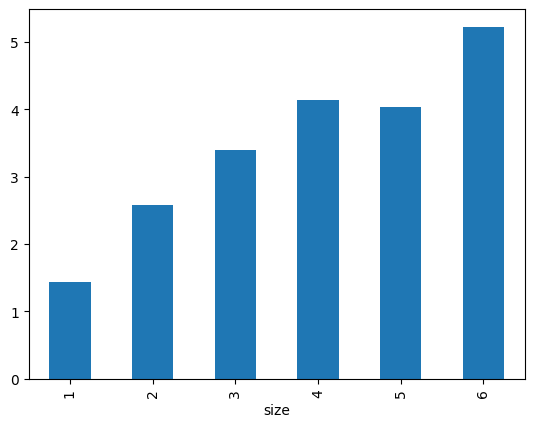

In [ ]:
df.groupby('size')['tip'].mean().plot(kind='bar')


#### Setting Indexes

In [ ]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


##### Indexing by day and time

In [ ]:
df.set_index(['day','time'],inplace=True)

In [ ]:
df

total_bill   tip     sex smoker  size
day  time                                         
Sun  Dinner       16.99  1.01  Female     No     2
     Dinner       10.34  1.66    Male     No     3
     Dinner       21.01  3.50    Male     No     3
     Dinner       23.68  3.31    Male     No     2
     Dinner       24.59  3.61  Female     No     4
...                 ...   ...     ...    ...   ...
Sat  Dinner       29.03  5.92    Male     No     3
     Dinner       27.18  2.00  Female    Yes     2
     Dinner       22.67  2.00    Male    Yes     2
     Dinner       17.82  1.75    Male     No     2
Thur Dinner       18.78  3.00  Female     No     2

[244 rows x 5 columns]

##### Perform Group by operation

In [ ]:
# Perform a groupby operation with the hierarchical index
df_grouped = df.groupby(['day', 'time'])['tip'].mean()
df_grouped

<ipython-input-16-56c61f1e0c76>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_grouped = df.groupby(['day', 'time'])['tip'].mean()


day   time  
Thur  Lunch     2.767705
      Dinner    3.000000
Fri   Lunch     2.382857
      Dinner    2.940000
Sat   Lunch          NaN
      Dinner    2.993103
Sun   Lunch          NaN
      Dinner    3.255132
Name: tip, dtype: float64

##### Reset Index

In [ ]:
# Reset index to convert multi-level index back into columns
df_reset = df.reset_index()

In [ ]:
df_reset

,day,time,total_bill,tip,sex,smoker,size
0,Sun,Dinner,16.99,1.01,Female,No,2
1,Sun,Dinner,10.34,1.66,Male,No,3
2,Sun,Dinner,21.01,3.50,Male,No,3
3,Sun,Dinner,23.68,3.31,Male,No,2
4,Sun,Dinner,24.59,3.61,Female,No,4
...,...,...,...,...,...,...,...
239,Sat,Dinner,29.03,5.92,Male,No,3
240,Sat,Dinner,27.18,2.00,Female,Yes,2
241,Sat,Dinner,22.67,2.00,Male,Yes,2
242,Sat,Dinner,17.82,1.75,Male,No,2


#### Feature Engineering

##### Binning

In [ ]:

# Example: Binning 'total_bill' into categories using `pd.cut()`
df_reset['bill_bin'] = pd.cut(df_reset['total_bill'], bins=[0, 10, 20, 30, 50, 100], labels=['Low', 'Medium', 'High', 'Very High', 'Luxury'])

In [ ]:
df_reset

,day,time,total_bill,tip,sex,smoker,size,tip_bin,is_saturday,group_size_label,bill_bin
0,SUN,Dinner,18.689,1.111,Female,No,2,Standard,False,Small,Medium
1,SUN,Dinner,11.374,1.826,Male,No,3,Standard,False,Small,Medium
2,SUN,Dinner,23.111,3.850,Male,No,3,Generous,False,Small,High
3,SUN,Dinner,26.048,3.641,Male,No,2,Generous,False,Small,High
4,SUN,Dinner,27.049,3.971,Female,No,4,Generous,False,Medium,High
...,...,...,...,...,...,...,...,...,...,...,...
239,SAT,Dinner,31.933,6.512,Male,No,3,Generous,True,Small,Very High
240,SAT,Dinner,29.898,2.200,Female,Yes,2,Standard,True,Small,High
241,SAT,Dinner,24.937,2.200,Male,Yes,2,Standard,True,Small,High
242,SAT,Dinner,19.602,1.925,Male,No,2,Standard,True,Small,Medium


##### Mapping and Applymap

In [ ]:
 #---- Map and Applymap for Feature Engineering ----
# Using `map()` to create a new feature based on categorical data
df_reset['tip_bin'] = df_reset['tip'].map(lambda x: 'Generous' if x > 3 else 'Standard')

In [ ]:
df_reset

,day,time,total_bill,tip,sex,smoker,size,tip_bin
0,Sun,Dinner,16.99,1.01,Female,No,2,Standard
1,Sun,Dinner,10.34,1.66,Male,No,3,Standard
2,Sun,Dinner,21.01,3.50,Male,No,3,Generous
3,Sun,Dinner,23.68,3.31,Male,No,2,Generous
4,Sun,Dinner,24.59,3.61,Female,No,4,Generous
...,...,...,...,...,...,...,...,...
239,Sat,Dinner,29.03,5.92,Male,No,3,Generous
240,Sat,Dinner,27.18,2.00,Female,Yes,2,Standard
241,Sat,Dinner,22.67,2.00,Male,Yes,2,Standard
242,Sat,Dinner,17.82,1.75,Male,No,2,Standard


In [ ]:
size_map = {
    1: 'Solo',
    2: 'Small',
    3: 'Small',
    4: 'Medium',
    5: 'Medium',
    6: 'Large'}

df_reset['group_size_label'] = df_reset['size'].map(size_map)
df_reset


,day,time,total_bill,tip,sex,smoker,size,tip_bin,is_saturday,group_size_label
0,SUN,Dinner,18.689,1.111,Female,No,2,Standard,False,Small
1,SUN,Dinner,11.374,1.826,Male,No,3,Standard,False,Small
2,SUN,Dinner,23.111,3.850,Male,No,3,Generous,False,Small
3,SUN,Dinner,26.048,3.641,Male,No,2,Generous,False,Small
4,SUN,Dinner,27.049,3.971,Female,No,4,Generous,False,Medium
...,...,...,...,...,...,...,...,...,...,...
239,SAT,Dinner,31.933,6.512,Male,No,3,Generous,True,Small
240,SAT,Dinner,29.898,2.200,Female,Yes,2,Standard,True,Small
241,SAT,Dinner,24.937,2.200,Male,Yes,2,Standard,True,Small
242,SAT,Dinner,19.602,1.925,Male,No,2,Standard,True,Small


In [ ]:
# Applying a function to each element of the DataFrame using `applymap()`
df_reset[['total_bill', 'tip']] = df_reset[['total_bill', 'tip']].applymap(lambda x: x * 1.1)  # Example: Increase each value by 10%


<ipython-input-21-db7b5632fe4f>:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df_reset[['total_bill', 'tip']] = df_reset[['total_bill', 'tip']].applymap(lambda x: x * 1.1)  # Example: Increase each value by 10%


In [ ]:
df_reset

,day,time,total_bill,tip,sex,smoker,size,tip_bin
0,Sun,Dinner,18.689,1.111,Female,No,2,Standard
1,Sun,Dinner,11.374,1.826,Male,No,3,Standard
2,Sun,Dinner,23.111,3.850,Male,No,3,Generous
3,Sun,Dinner,26.048,3.641,Male,No,2,Generous
4,Sun,Dinner,27.049,3.971,Female,No,4,Generous
...,...,...,...,...,...,...,...,...
239,Sat,Dinner,31.933,6.512,Male,No,3,Generous
240,Sat,Dinner,29.898,2.200,Female,Yes,2,Standard
241,Sat,Dinner,24.937,2.200,Male,Yes,2,Standard
242,Sat,Dinner,19.602,1.925,Male,No,2,Standard


#### Strings

In [ ]:
# ---- String Manipulation ----
# Example: String functions for manipulation
df_reset['day'] = df_reset['day'].str.upper()  # Convert 'day' column to uppercase
df_reset['sex'] = df_reset['sex'].str.capitalize()  # Capitalize the first letter of 'sex'

In [ ]:

# Check if the 'day' contains 'SAT' (useful for filtering or creating new features)
df_reset['is_saturday'] = df_reset['day'].str.contains('Sat')


In [ ]:
df_reset

,day,time,total_bill,tip,sex,smoker,size,tip_bin,is_saturday
0,Sun,Dinner,18.689,1.111,Female,No,2,Standard,False
1,Sun,Dinner,11.374,1.826,Male,No,3,Standard,False
2,Sun,Dinner,23.111,3.850,Male,No,3,Generous,False
3,Sun,Dinner,26.048,3.641,Male,No,2,Generous,False
4,Sun,Dinner,27.049,3.971,Female,No,4,Generous,False
...,...,...,...,...,...,...,...,...,...
239,Sat,Dinner,31.933,6.512,Male,No,3,Generous,True
240,Sat,Dinner,29.898,2.200,Female,Yes,2,Standard,True
241,Sat,Dinner,24.937,2.200,Male,Yes,2,Standard,True
242,Sat,Dinner,19.602,1.925,Male,No,2,Standard,True


#### Machine Learning Pipelines

In [ ]:
# ---- Machine Learning Model ----
# Preparing features and target for machine learning model
X = df_reset[['total_bill', 'size', 'bill_bin']]  # Features
X = pd.get_dummies(X, drop_first=True)  # One-hot encode categorical variables
y = df_reset['tip'] > 3  # Target: 1 if tip > 3, else 0 (binary classification)

In [ ]:
X

,total_bill,size,bill_bin_Medium,bill_bin_High,bill_bin_Very High,bill_bin_Luxury
0,18.689,2,True,False,False,False
1,11.374,3,True,False,False,False
2,23.111,3,False,True,False,False
3,26.048,2,False,True,False,False
4,27.049,4,False,True,False,False
...,...,...,...,...,...,...
239,31.933,3,False,True,False,False
240,29.898,2,False,True,False,False
241,24.937,2,False,True,False,False
242,19.602,2,True,False,False,False


In [ ]:
y

,tip
0,False
1,False
2,True
3,True
4,True
...,...
239,True
240,False
241,False
242,False


In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
y_train

,tip
228,False
208,False
96,True
167,True
84,False
...,...
106,True
14,True
92,False
179,True


In [ ]:
# Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predict and evaluate
y_pred = model.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

Accuracy: 0.67


#### Hierarchical Indexing

In [ ]:
# ---- Hierarchical Indexing ----
# Set a multi-level index and swa levels
df_reset.set_index(['sex', 'day'], inplace=True)

# Perform aggregation
swapped_group = df_reset.groupby(['sex', 'day'])['tip'].mean()

In [ ]:
df_reset

time  total_bill    tip smoker  size   tip_bin  is_saturday  \
sex    day                                                                   
Female SUN   Dinner      18.689  1.111     No     2  Standard        False   
Male   SUN   Dinner      11.374  1.826     No     3  Standard        False   
       SUN   Dinner      23.111  3.850     No     3  Generous        False   
       SUN   Dinner      26.048  3.641     No     2  Generous        False   
Female SUN   Dinner      27.049  3.971     No     4  Generous        False   
...             ...         ...    ...    ...   ...       ...          ...   
Male   SAT   Dinner      31.933  6.512     No     3  Generous         True   
Female SAT   Dinner      29.898  2.200    Yes     2  Standard         True   
Male   SAT   Dinner      24.937  2.200    Yes     2  Standard         True   
       SAT   Dinner      19.602  1.925     No     2  Standard         True   
Female THUR  Dinner      20.658  3.300     No     2  Standard        False   

            group_size_label   bill_bin  
sex    day                               
Female SUN             Small     Medium  
Male   SUN             Small     Medium  
       SUN             Small       High  
       SUN             Small       High  
Female SUN            Medium       High  
...                      ...        ...  
Male   SAT             Small  Very High  
Female SAT             Small       High  
Male   SAT             Small       High  
       SAT             Small     Medium  
Female THUR            Small       High  

[244 rows x 9 columns]

In [ ]:
swapped_group

sex     day 
Female  FRI     3.059222
        SAT     3.081964
        SUN     3.703944
        THUR    2.833188
Male    FRI     2.962300
        SAT     3.392288
        SUN     3.542379
        THUR    3.278367
Name: tip, dtype: float64

In [ ]:
# ---- Swapping Hierarchical Index Levels ----
# Swap the hierarchical index levels (from ['sex', 'day'] to ['day', 'sex'])
df_reset = df_reset.swaplevel('sex', 'day')

In [ ]:
df_reset

time  total_bill    tip smoker  size   tip_bin  is_saturday  \
day  sex                                                                     
SUN  Female  Dinner      18.689  1.111     No     2  Standard        False   
     Male    Dinner      11.374  1.826     No     3  Standard        False   
     Male    Dinner      23.111  3.850     No     3  Generous        False   
     Male    Dinner      26.048  3.641     No     2  Generous        False   
     Female  Dinner      27.049  3.971     No     4  Generous        False   
...             ...         ...    ...    ...   ...       ...          ...   
SAT  Male    Dinner      31.933  6.512     No     3  Generous         True   
     Female  Dinner      29.898  2.200    Yes     2  Standard         True   
     Male    Dinner      24.937  2.200    Yes     2  Standard         True   
     Male    Dinner      19.602  1.925     No     2  Standard         True   
THUR Female  Dinner      20.658  3.300     No     2  Standard        False   

            group_size_label   bill_bin  
day  sex                                 
SUN  Female            Small     Medium  
     Male              Small     Medium  
     Male              Small       High  
     Male              Small       High  
     Female           Medium       High  
...                      ...        ...  
SAT  Male              Small  Very High  
     Female            Small       High  
     Male              Small       High  
     Male              Small     Medium  
THUR Female            Small       High  

[244 rows x 9 columns]

#### Time Series

In [ ]:
# Sample data: Hourly sales for different stores on different dates
data = {
    'Store': ['A', 'A', 'A', 'B', 'B', 'B'],
    'Date': ['2023-01-01', '2023-01-01', '2023-01-02', '2023-01-01', '2023-01-01', '2023-01-02'],
    'Hour': [9, 10, 9, 9, 10, 9],
    'Sales': [100, 150, 200, 120, 180, 250]
}

# Create DataFrame
df = pd.DataFrame(data)

# Set hierarchical index on 'Store', 'Date', and 'Hour'
df.set_index(['Store', 'Date', 'Hour'], inplace=True)

# View the data
print(df)


                       Sales
Store Date       Hour       
A     2023-01-01 9       100
                 10      150
      2023-01-02 9       200
B     2023-01-01 9       120
                 10      180
      2023-01-02 9       250


In [ ]:
df.reset_index(inplace=True)

In [ ]:
df

,day,time,total_bill,tip,sex,smoker,size
0,Sun,Dinner,16.99,1.01,Female,No,2
1,Sun,Dinner,10.34,1.66,Male,No,3
2,Sun,Dinner,21.01,3.50,Male,No,3
3,Sun,Dinner,23.68,3.31,Male,No,2
4,Sun,Dinner,24.59,3.61,Female,No,4
...,...,...,...,...,...,...,...
239,Sat,Dinner,29.03,5.92,Male,No,3
240,Sat,Dinner,27.18,2.00,Female,Yes,2
241,Sat,Dinner,22.67,2.00,Male,Yes,2
242,Sat,Dinner,17.82,1.75,Male,No,2


##### Swapping Levels

In [ ]:
# Continuing with the previous data, let's swap the levels for different perspectives
df_swapped = df.swaplevel('Store', 'Date')

# View the swapped data
print(df_swapped)


                       Sales
Date       Store Hour       
2023-01-01 A     9       100
                 10      150
2023-01-02 A     9       200
2023-01-01 B     9       120
                 10      180
2023-01-02 B     9       250


In [ ]:
df_swapped.reset_index(inplace=True)

In [ ]:
df_swapped

,Date,Store,Hour,Sales
0,2023-01-01,A,9,100
1,2023-01-01,A,10,150
2,2023-01-02,A,9,200
3,2023-01-01,B,9,120
4,2023-01-01,B,10,180
5,2023-01-02,B,9,250
